## **Motivation**

The motivation behind choosing this dataset lies in its real-world applicability, specifically in unraveling the complex relationship between sales reps and product types. The personalized nature of the dataset, its ownership, provides an opportunity to learn by increasing the relevance and depth of analysis. The project's emphasis on a variety of techniques, from exploratory data analysis to machine learning, demonstrates a comprehensive approach to data science. The practical implications of the findings, which contribute to sales strategy optimization and representative performance evaluation, underline the potential impact of the project. Finally, participating in this analysis contributes not only to personal learning but also to the development of a professional data science portfolio; This reflects a commitment to continued growth and competence in the field. **In conclusion, I aspire to shed light on the specific steps the company should prioritize in the future. Through the insights gained from this analysis, I aim to provide actionable recommendations that will contribute to the company's continued success and informed decision-making.**

## Data collection and convert to dataFrame

In my job, I collected real-time operational data by systematically extracting details from proforma bills and organizing them in an Excel file. This hands-on approach facilitated a focused analysis, emphasizing the comparison of raw material costs and examination of procedural intricacies.

**I changed the data by hiding the surnames of the sales representatives and giving the ID numbers to the customers, as required by "KVKK".**

In [184]:
import pandas as pd

# Load the Excel file into a DataFrame
file_path = "Aralık_Ekim_Kasım_Maliyet_Raporu.xlsx"  # Replace with the actual file path
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df.head(8)



First few rows of the DataFrame:


,MUSTERI TEMSILCISI,SIPARISIN ID,TEKLIF TARIHI,TESLIM TARIHI,SIPARISIN URUN ICERIGI,SIPARISIN SATIS TUTARI,ISKONTO ORANI,ISKONTOLU SATIS TUTARI,SIPARISIN BAKILAN MALIYETI,MALIYET CARPANI
0,EBRAR Ö.,1,2023-11-30,2023-12-14,AHŞAP RAFI,49749.00,0.06,46666.55,18666.62,2.50
1,AYSE G.,2,2023-11-20,2023-12-15,MARKET RAFI,39554.00,0.00,39554.00,13790.83,2.87
2,MUSTAFA V.,3,2023-12-01,2023-12-01,AKSESUAR,1300.00,0.04,1250.00,566.50,2.21
3,MUSTAFA V.,4,2023-12-01,2023-12-01,AKSESUAR,2430.00,0.00,2430.00,829.80,2.93
4,AYSE G.,5,2023-11-30,2023-12-01,HAFİF DEPO RAFI,47090.00,0.03,45677.30,17450.21,2.62
5,FURKAN B.,6,2023-11-30,2024-01-14,HAFİF DEPO RAFI,90042.41,0.00,90042.41,39961.24,2.25
6,FURKAN B.,7,2023-11-29,2023-01-13,HAFİF DEPO RAFI,155367.45,0.00,155367.45,66876.23,2.32
7,MIKAIL B,8,2023-12-01,NaT,AKSESUAR,450.00,0.00,450.00,87.60,5.14


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   MUSTERI TEMSILCISI          753 non-null    object        
 1   SIPARISIN ID                753 non-null    int64         
 2   TEKLIF TARIHI               753 non-null    datetime64[ns]
 3   TESLIM TARIHI               567 non-null    datetime64[ns]
 4   SIPARISIN URUN ICERIGI      753 non-null    object        
 5   SIPARISIN SATIS TUTARI      753 non-null    float64       
 6   ISKONTO ORANI               753 non-null    float64       
 7   ISKONTOLU SATIS TUTARI      753 non-null    float64       
 8   SIPARISIN BAKILAN MALIYETI  753 non-null    float64       
 9   MALIYET CARPANI             751 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 59.0+ KB


## Data Processing

## Histogram Plot of the monthly sales by Sales Representatives

Checking for is there a significant difference between sales representatives (it will checked later on with hypothesis tests)

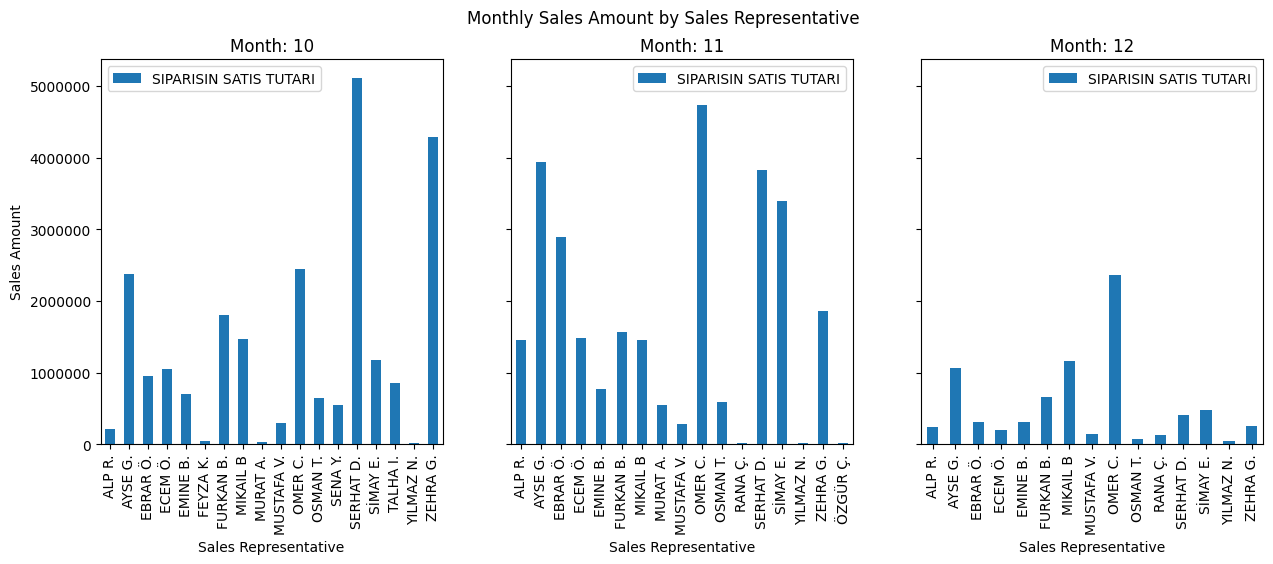

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert 'TEKLIF TARIHI' to datetime type
df['TEKLIF TARIHI'] = pd.to_datetime(df['TEKLIF TARIHI'])

# Extract month from 'TEKLIF TARIHI'
df['Month'] = df['TEKLIF TARIHI'].dt.month

# Group by 'Month' and 'MUSTERI TEMSILCISI', then sum the 'SIPARISIN SATIS TUTARI'
monthly_sales = df.groupby(['Month', 'MUSTERI TEMSILCISI'])['SIPARISIN SATIS TUTARI'].sum().reset_index()

# Define custom order for months
month_order = [10, 11, 12]

# Plot separate histograms for each month in the custom order
fig, axes = plt.subplots(1, len(month_order), figsize=(15, 5), sharey=True)
fig.suptitle('Monthly Sales Amount by Sales Representative')

for month, ax in zip(month_order, axes):
    month_data = monthly_sales[monthly_sales['Month'] == month]
    month_data.plot(kind='bar', x='MUSTERI TEMSILCISI', y='SIPARISIN SATIS TUTARI', ax=ax)
    ax.set_title(f'Month: {month}')
    ax.set_xlabel('Sales Representative')
    ax.set_ylabel('Sales Amount')
    ax.ticklabel_format(style='plain', axis='y')  # Display actual numbers on y-axis

plt.show()


## Line Plot of the monthly sales versus Total sales amount of Product Types

Checking for is there a significant difference between product types (it will checked later on with hypothesis tests)

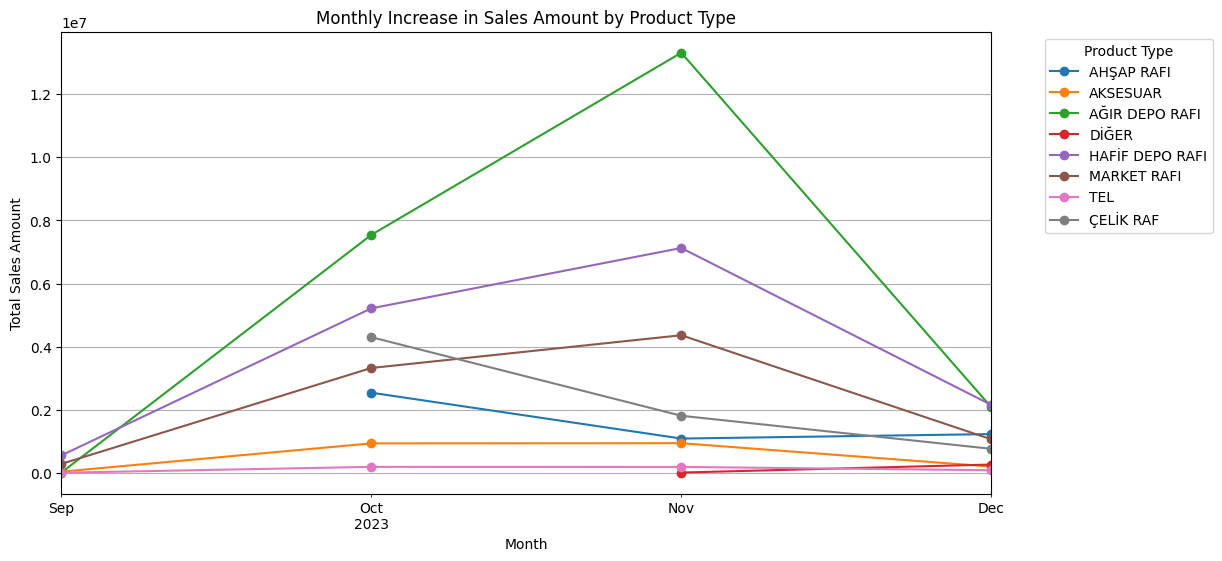

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with relevant columns
# Update this based on your actual data

# Parse 'TEKLIF TARIHI' as datetime
df['TEKLIF TARIHI'] = pd.to_datetime(df['TEKLIF TARIHI'], format='%d.%m.%Y')

# Extract month and year from 'TEKLIF TARIHI'
df['Month'] = df['TEKLIF TARIHI'].dt.to_period('M')

# Group by month and product type, summing up the sales amount
monthly_sales = df.groupby(['Month', 'SIPARISIN URUN ICERIGI'])['SIPARISIN SATIS TUTARI'].sum().unstack()

# Plot the line chart
plt.figure(figsize=(12, 6))
lines = monthly_sales.plot(marker='o', linestyle='-', ax=plt.gca())
plt.title('Monthly Increase in Sales Amount by Product Type')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')

# Get product type names
product_types = monthly_sales.columns

# Set legend labels
lines = lines.get_lines()
plt.legend(lines, product_types, title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()


## Hypothesis Test for sales amount difference among product types

**Ho:** There is **"no"** significant difference in sales amounts among different product types.

**Ha:** There is a significant difference in sales amounts among different product types.

In [188]:
from scipy.stats import f_oneway

# Perform ANOVA for different product types
product_types = df['SIPARISIN URUN ICERIGI'].unique()

# Create separate groups for each product type
groups = [df[df['SIPARISIN URUN ICERIGI'] == product]['SIPARISIN SATIS TUTARI'] for product in product_types]

# Perform the ANOVA
f_stat, p_value = f_oneway(*groups)

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in sales amounts among different product types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales amounts among different product types.")


Reject the null hypothesis: There is a significant difference in sales amounts among different product types.


so there is a difference we should find the what differs

## The Actual months total sales versus Product type

I am checking the actual total sales of the product types to understand what is differs the other types.

<ipython-input-189-f01553c553dc>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SIPARISIN URUN ICERIGI', y='SIPARISIN SATIS TUTARI', data=df, ci=None, estimator=np.mean)


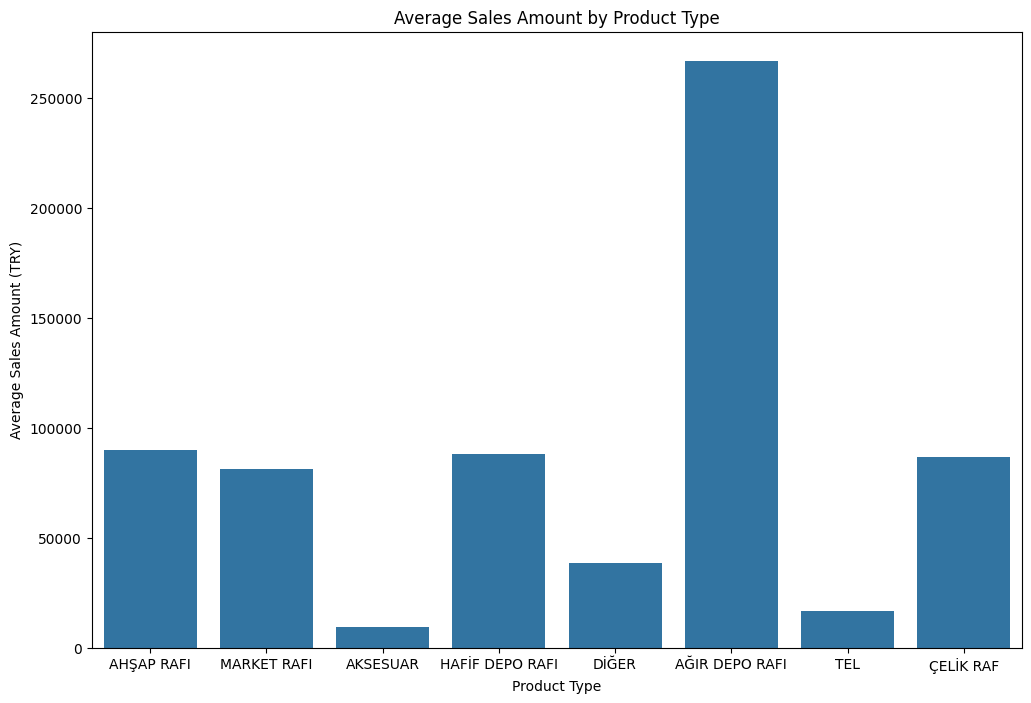

In [189]:
import numpy as np
import seaborn as sns

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='SIPARISIN URUN ICERIGI', y='SIPARISIN SATIS TUTARI', data=df, ci=None, estimator=np.mean)
plt.title('Average Sales Amount by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Sales Amount (TRY)')
plt.show()


We can see clearly the Ağır Depo Rafı is significant role in sales. We can focus on "Ağır Depo" more.

## Train Model that next month expected sales for product type

We check because if we are going to focus on "Ağır Depo Rafı" type product, we need to make more predictions and keep stock.
Therefore ı train a model that estimates the next month sales by the product type.

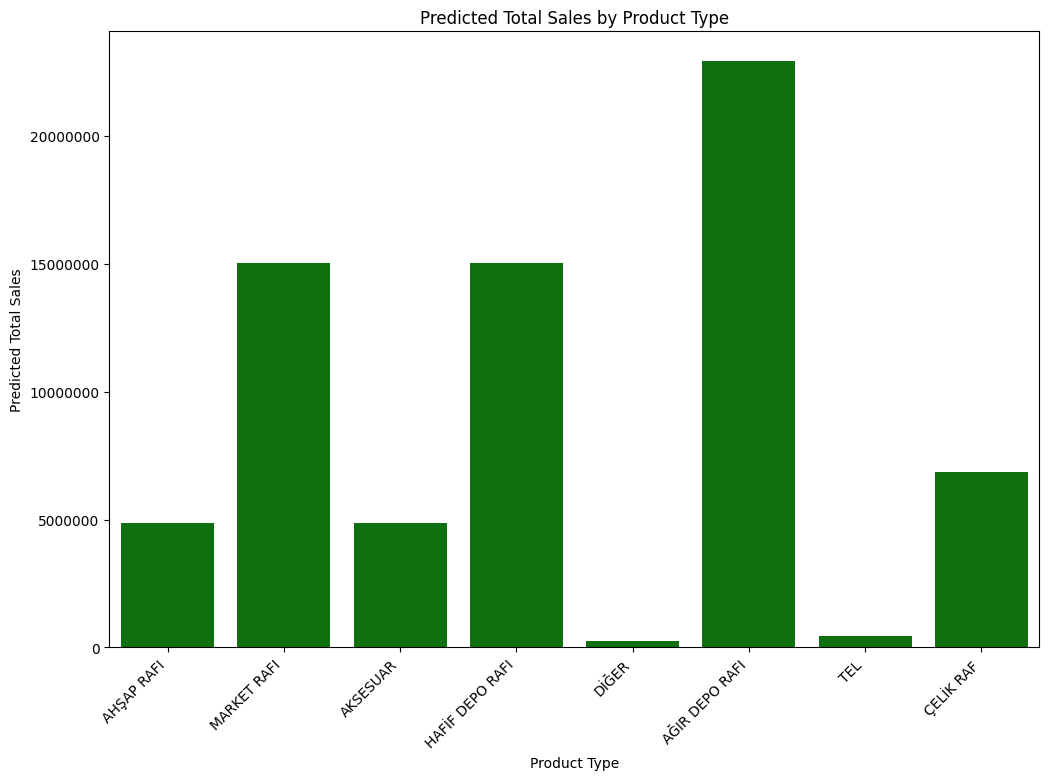

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Load the data
file_path = "Aralık_Ekim_Kasım_Maliyet_Raporu.xlsx"
df = pd.read_excel(file_path)

# Define the custom order for product types
custom_order = ['AHŞAP RAFI', 'MARKET RAFI', 'AKSESUAR', 'HAFİF DEPO RAFI', 'DİĞER', 'AĞIR DEPO RAFI', 'TEL', 'ÇELİK RAF']

# Basic feature engineering: Label encode the 'SIPARISIN URUN ICERIGI' column
label_encoder = LabelEncoder()
df['SIPARISIN URUN ICERIGI'] = label_encoder.fit_transform(df['SIPARISIN URUN ICERIGI'])

# Group by product type and calculate total sales for each type
grouped_df = df.groupby('SIPARISIN URUN ICERIGI')['SIPARISIN SATIS TUTARI'].sum().reset_index()

# Split the data into features and target
X = grouped_df[['SIPARISIN URUN ICERIGI']]
y = grouped_df['SIPARISIN SATIS TUTARI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Predict total sales for all product types
X_all_types = pd.DataFrame({'SIPARISIN URUN ICERIGI': range(len(label_encoder.classes_))})
y_pred_all_types = model.predict(X_all_types)

# Plot the predicted total sales for each product type with custom order and green color
plt.figure(figsize=(12, 8))
sns.barplot(x=label_encoder.inverse_transform(X_all_types['SIPARISIN URUN ICERIGI']), y=y_pred_all_types, order=custom_order, color='green')
plt.title('Predicted Total Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Predicted Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis labels in plain format
plt.show()


**clearly the "Ağır Depo Rafı" dominant in sales so definetly the firm focuses on this. The investment will be make on this.**

\

## Hypothesis Test for sales amount difference among sales reprensentatives


So we achieved first hypothesis test and conclusion. The second one is Sales representatives and total sales amount.

**Ho:** There is a significant difference in sales amounts among different customer representatives.

**Ha:** There is no significant difference in sales amounts among different customer representatives.

In [177]:
from scipy.stats import f_oneway

# Perform ANOVA for different customer representatives
customer_representatives = df['MUSTERI TEMSILCISI'].unique()

# Create separate groups for each customer representative
groups = [df[df['MUSTERI TEMSILCISI'] == rep]['SIPARISIN SATIS TUTARI'] for rep in customer_representatives]

# Perform the ANOVA
f_stat, p_value = f_oneway(*groups)

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in sales amounts among different customer representatives.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales amounts among different customer representatives.")


Reject the null hypothesis: There is a significant difference in sales amounts among different customer representatives.


so there is a difference we should find the who is differs

## Total sales amount versus sales representatives

I am checking for the who is the best seller. By ordering their total amount of sales

Ranked Customer Representatives by Total Sales Amount:
MUSTERI TEMSILCISI
OMER C.      9543290.10
SERHAT D.    9347787.50
AYSE G.      7696035.70
ZEHRA G.     6408321.37
SİMAY E.     5062720.98
EBRAR Ö.     4151230.57
MIKAIL B     4087774.65
FURKAN B.    4031361.71
ECEM Ö.      2758369.78
ALP R.       2098105.63
EMINE B.     1848883.49
OSMAN T.     1304874.61
TALHA I.      848983.93
MUSTAFA V.    735530.32
MURAT A.      579537.20
SENA Y.       550382.00
FEYZA K.      267820.02
RANA Ç.       151474.00
YILMAZ N.      75265.76
ÖZGÜR Ç.       11810.00
Name: SIPARISIN SATIS TUTARI, dtype: float64


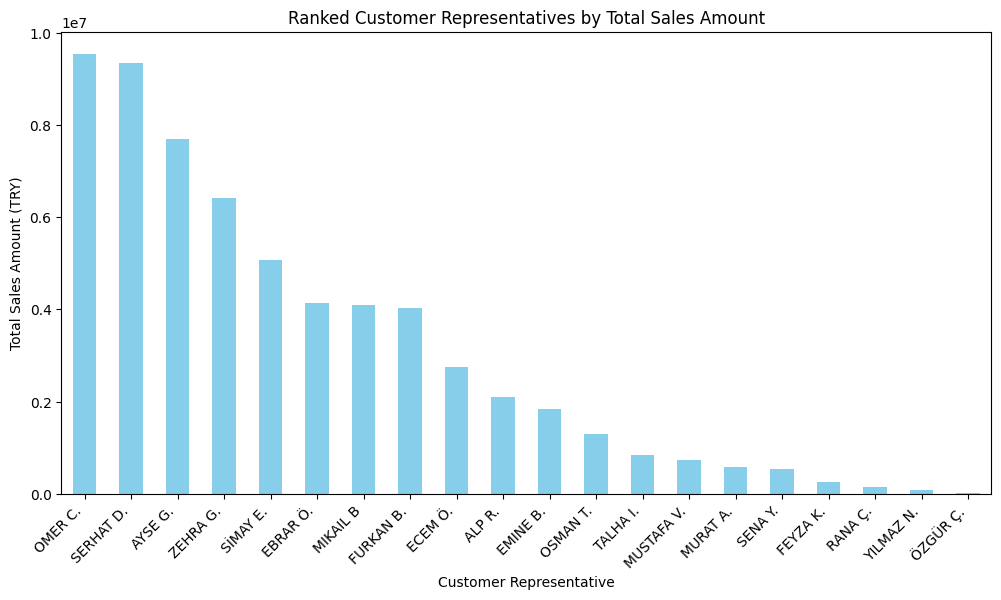

In [178]:
# Calculate total sales amounts by customer representative
total_sales_by_rep = df.groupby('MUSTERI TEMSILCISI')['SIPARISIN SATIS TUTARI'].sum()

# Rank the representatives based on total sales amounts
ranked_reps_total_sales = total_sales_by_rep.sort_values(ascending=False)

# Set pandas display option to show full decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display the ranked representatives based on total sales
print("Ranked Customer Representatives by Total Sales Amount:")
print(ranked_reps_total_sales)

import matplotlib.pyplot as plt

# Set pandas display option to show full decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Create a bar plot for the ranked representatives based on total sales
plt.figure(figsize=(12, 6))
ranked_reps_total_sales.plot(kind='bar', color='skyblue')
plt.title('Ranked Customer Representatives by Total Sales Amount')
plt.xlabel('Customer Representative')
plt.ylabel('Total Sales Amount (TRY)')
plt.xticks(rotation=45, ha='right')
plt.show()


the Ömer Ç., Serhat D. and Ayşe G. is dominates the total sales


**but we should check that is the sales representative is sold the items in good profit or just give it to for the cost of the material itself?**

Because whoever has the most sales does not mean he/she is the best seller. So ı am checking for the is there a relationship between sales representetive between profit margin.

In [179]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming 'df' is your DataFrame
# Extract relevant columns: 'MUSTERI TEMSILCISI' and 'ISKONTOLU SATIS TUTARI'
sales_representatives = df['MUSTERI TEMSILCISI'].unique()

# Calculate average profit margin for each sales representative
avg_profit_margin = df.groupby('MUSTERI TEMSILCISI')['ISKONTOLU SATIS TUTARI'].mean()


# Perform ANOVA to test for significant differences
f_stat, p_value = f_oneway(*[df[df['MUSTERI TEMSILCISI'] == rep]['ISKONTOLU SATIS TUTARI'] for rep in sales_representatives])

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in profit margins among sales representatives.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in profit margins among sales representatives.")


Reject the null hypothesis: There is a significant difference in profit margins among sales representatives.


yes there is profit margin difference

In [180]:
# Assuming you have a DataFrame 'df' with relevant columns
sales_amount_column = 'SIPARISIN SATIS TUTARI'
discounted_amount_column = 'ISKONTOLU SATIS TUTARI'
cost_multiplier_column = 'MALIYET CARPANI'
sales_rep_column = 'MUSTERI TEMSILCISI'

# Calculate profit for each order
df['Profit'] = df[sales_amount_column] - df[discounted_amount_column]

# Calculate profit margin for each order
df['Profit Margin'] = (df['Profit'] / df[sales_amount_column]) * 100

# Calculate average profit margin for each sales representative
avg_profit_margin = df.groupby(sales_rep_column)['Profit Margin'].mean()

# Sort the Series in descending order
sorted_avg_profit_margin = avg_profit_margin.sort_values(ascending=False)

# Print the ranked list
print("Sales Representatives Ranked by Average Profit Margin:")
print(sorted_avg_profit_margin)


Sales Representatives Ranked by Average Profit Margin:
MUSTERI TEMSILCISI
SERHAT D.    17.52
SENA Y.      16.04
TALHA I.     11.82
SİMAY E.     10.44
RANA Ç.       8.98
ECEM Ö.       7.70
ZEHRA G.      7.37
MIKAIL B      6.82
EMINE B.      6.23
EBRAR Ö.      5.95
AYSE G.       5.89
ALP R.        5.07
ÖZGÜR Ç.      4.74
OSMAN T.      3.91
MURAT A.      3.09
YILMAZ N.     2.16
OMER C.       1.23
MUSTAFA V.    0.77
FURKAN B.     0.00
FEYZA K.      0.00
Name: Profit Margin, dtype: float64


so when we checked the top 3
Ömer Ç., Serhat D., and Ayşe G.
the best seller is
1. Serhat D.
2. Ayşe G.
3. Ömer Ç.

therefore the company make sure that Ömer Ç. that increases the profit margin because he has the most sales amount

## Train model that evaluates next month best sales representetive

We check because if we are going to focus on "Serhat D.", we need to make more predictions to he/she will continous the same performance.
Therefore I train a model that estimates the next month sales by the sales representetive.

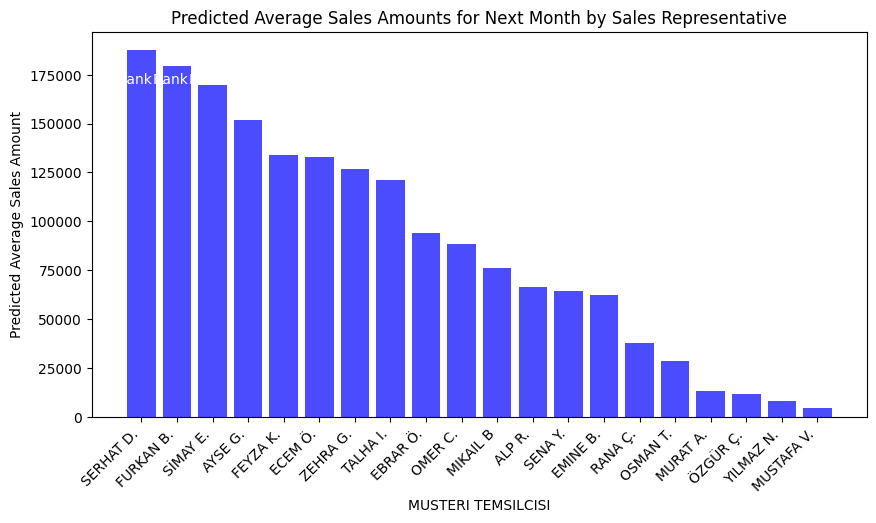

In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with relevant columns
# X should be the features, y should be the target variable

# Example: Using 'MUSTERI TEMSILCISI' as the feature
X = df[['MUSTERI TEMSILCISI']]
y = df['SIPARISIN SATIS TUTARI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessor to handle categorical encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['MUSTERI TEMSILCISI'])
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and a Linear Regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Now, you can use the model to predict the next month's average sales amount for each sales representative
X_representatives = pd.DataFrame({'MUSTERI TEMSILCISI': X['MUSTERI TEMSILCISI'].unique()})
predicted_sales = model.predict(X_representatives)

# Create a DataFrame with predicted sales and representatives
result_df = pd.DataFrame({'MUSTERI TEMSILCISI': X_representatives['MUSTERI TEMSILCISI'],
                           'Predicted Sales': predicted_sales})

# Rank the representatives based on predicted sales
result_df['Rank'] = result_df['Predicted Sales'].rank(ascending=False)

# Sort the DataFrame by rank
result_df = result_df.sort_values(by='Rank')

# Plot the histogram for predicted average sales amounts
plt.figure(figsize=(10, 5))
plt.bar(result_df['MUSTERI TEMSILCISI'], result_df['Predicted Sales'], color='blue', alpha=0.7)
plt.title('Predicted Average Sales Amounts for Next Month by Sales Representative')
plt.xlabel('MUSTERI TEMSILCISI')
plt.ylabel('Predicted Average Sales Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the rank on top of each bar
for index, value in enumerate(result_df['Rank']):
    plt.text(index, result_df['Predicted Sales'].max() * 0.9, f"Rank {int(value)}", ha='center', va='bottom', color='white')

plt.show()


as we can see that Serhat D. is the best seller and the who has best profit margin. The human resource should think that salary increase end of the month if Serhat D. still performs well.

## Check is there a relationship with Sales representative and Product types?

we checked to hypothesis upon sales representative and product types over total amount of sales so I will check is there a relationship between them.

**Ho:**  There is **"no"** significant relationship between Sales Representatives and Product Types.

**Ha:** There is a significant relationship between Sales Representatives and Product Types.

In [182]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame 'df' with relevant columns
# Replace these column names with the actual column names in your DataFrame
sales_rep_column = 'MUSTERI TEMSILCISI'
product_type_column = 'SIPARISIN URUN ICERIGI'

# Create a contingency table
contingency_table = pd.crosstab(df[sales_rep_column], df[product_type_column])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check the p-value
if p < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Sales Representatives and Product Types.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Sales Representatives and Product Types.")


Reject the null hypothesis: There is a significant relationship between Sales Representatives and Product Types.


yes there is a relationship

we can check with heat map that which representetive is sellin which type of product

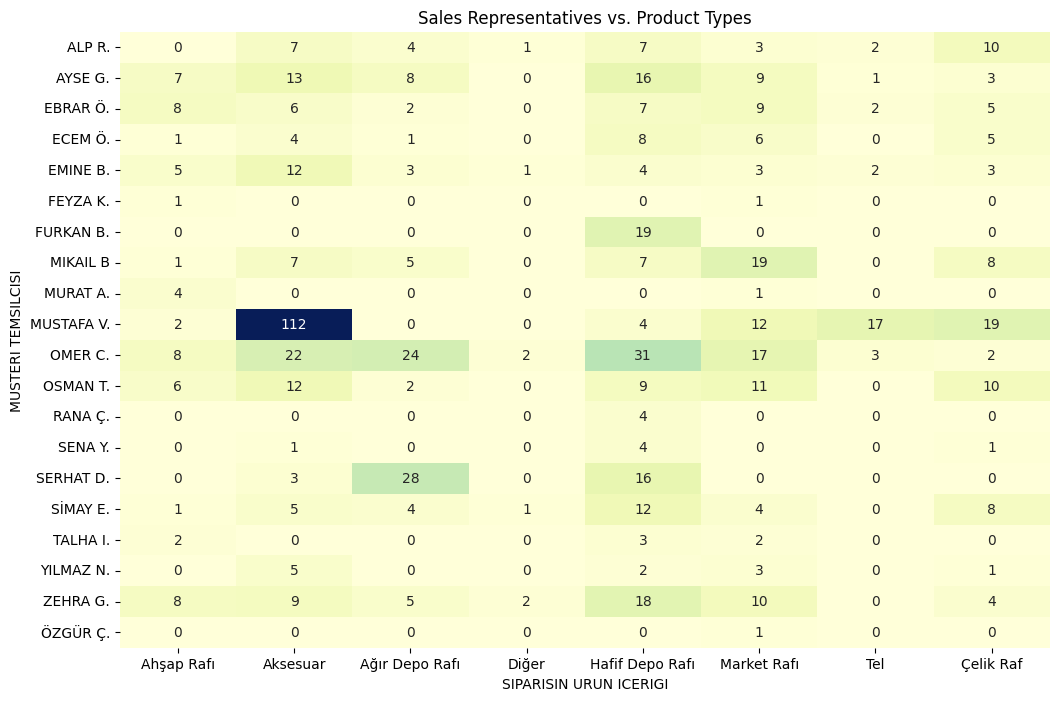

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame 'df' with relevant columns
sales_rep_column = 'MUSTERI TEMSILCISI'
product_type_column = 'SIPARISIN URUN ICERIGI'

# Define your product types in the desired order
desired_order = ['Ahşap Rafı', 'Aksesuar', 'Ağır Depo Rafı', 'Diğer', 'Hafif Depo Rafı', 'Market Rafı', 'Tel', 'Çelik Raf']

# Create a contingency table
contingency_table = pd.crosstab(df[sales_rep_column], df[product_type_column])

# Plot a heatmap of the contingency table with custom x-axis labels and desired order
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", cbar=False, xticklabels=desired_order)

plt.title("Sales Representatives vs. Product Types")
plt.xlabel(product_type_column)
plt.ylabel(sales_rep_column)
plt.show()


## Conclusion

as we can see that the frequency is much higher in the aksesuar but we find that the profit margin is higher in the ağır depo therefore we should direct the ağır depo sales to representetives.

also the company should focus mostly "**Ağır Depo**" side investments, machinery, adverts and new sales representetive educations.